In [5]:
{-# LANGUAGE NoMonomorphismRestriction FlexibleContexts TypeFamilies #-}
import Diagrams.Prelude
import Diagrams.Backend.Cairo.CmdLine
import Data.List
import Data.Colour.SRGB (sRGB24read)

type Dia = Diagram B

First, some colors for our disks, and types to represent the data
structures involved.



In [6]:
colors = cycle $ map sRGB24read [ "#9FB4CC", "#CCCC9F", "#DB4105", "#FFF8E3", "#33332D"]

type Disk  = Int
type Stack = [Disk]
type Hanoi = [Stack]
type Move  = (Int,Int)

To render a single disk, draw a rectangle with width proportional to
its disk number, using a color selected from the `colors` list.



In [7]:
renderDisk n = rect (fromIntegral n + 2) 1
               # lc black
               # lw thin
               # fc (colors !! n)

To render a stack of disks, just stack their renderings on top of a
drawing of a peg.  We use `alignB` to place stack of disks at the
bottom of the peg.



In [8]:
renderStack :: Stack -> Dia
renderStack s = disks `atop` post
  where disks = (vcat . map renderDisk $ s)
                # alignB
        post  = rect 0.8 6
                # lw none
                # fc black
                # alignB

Finally, to render a collection of stacks, lay them out
horizontally, using the `Distrib` method so the pegs end up spaced
evenly no matter the width of the disks on any particular peg.



In [9]:
renderHanoi :: Hanoi -> Dia
renderHanoi = hcat' (with & catMethod .~ Distrib & sep .~ 7) . map renderStack


Now some code to actually solve the puzzle, generating a list of moves
which are then used to simulate the solution and generate a list of
configurations.



In [10]:
solveHanoi :: Int -> [Move]
solveHanoi n = solveHanoi' n 0 1 2
  where solveHanoi' 0 _ _ _ = []
        solveHanoi' n a b c = solveHanoi' (n-1) a c b ++ [(a,c)]
                              ++ solveHanoi' (n-1) b a c

doMove :: Move -> Hanoi -> Hanoi
doMove (x,y) h = h''
  where (d,h')         = removeDisk x h
        h''            = addDisk y d h'
        removeDisk x h = (head (h!!x), modList x tail h)
        addDisk y d    = modList y (d:)

modList i f l  = let (xs,(y:ys)) = splitAt i l in xs ++ (f y : ys)

hanoiSequence :: Int -> [Hanoi]
hanoiSequence n = scanl (flip ($)) [[0..n-1], [], []] (map doMove (solveHanoi n))


Line 14: Redundant bracket
Found:
(xs, (y : ys))
Why not:
(xs, y : ys)

Finally, we render a sequence of configurations representing a
solution by laying them out vertically.



In [11]:
renderHanoiSeq :: [Hanoi] -> Dia
renderHanoiSeq = vcat' (with & sep .~2) . map renderHanoi

example = pad 1.1 $ renderHanoiSeq (hanoiSequence 4) # centerXY

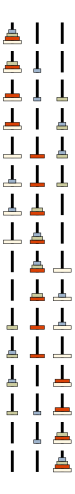

In [13]:
diagram example
